In [1]:
# pip install ucimlrepo
# !pip install imbalanced-learn



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

### The data are already divided into features and target. Look at data

In [4]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [5]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [6]:
print(X.shape)  # Shape of the features DataFrame
print(y.shape)  # Shape of the targets DataFrame (if applicable)


(48842, 14)
(48842, 1)


In [7]:
print(X.info())  # Information about the features DataFrame
print(y.info())  # Information about the targets DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Co

In [8]:
print(X.describe())  # Descriptive statistics for the features DataFrame
print(y.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
       income
count   48842
unique      4
top     <=50K
freq   

### Look at all the unique values in dataset

In [9]:
for column in X.columns:
    unique_values = X[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")


Unique values for age:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

Unique values for workclass:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

Unique values for fnlwgt:
[ 77516  83311 215646 ... 173449  89686 350977]

Unique values for education:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Unique values for education-num:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values for marital-status:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Unique values for occupation:
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' '

In [10]:
for column in y.columns:
    unique_values = y[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")


Unique values for income:
['<=50K' '>50K' '<=50K.' '>50K.']



In [11]:
# Replace values in the 'income' column
y['income'] = y['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

C:\Users\Acer\AppData\Local\Temp\ipykernel_9412\3161693252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'] = y['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})


In [12]:
for column in y.columns:
    unique_values = y[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")


Unique values for income:
['<=50K' '>50K']



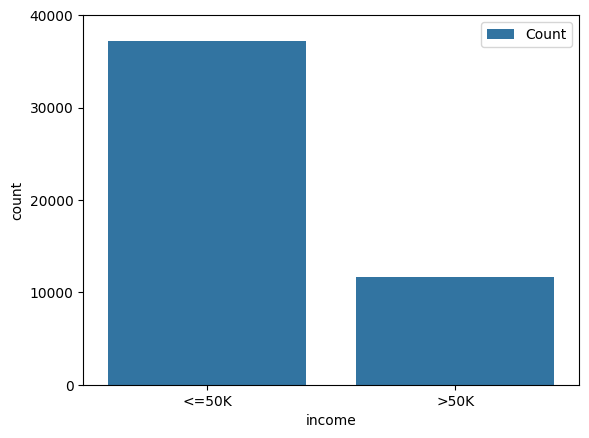

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of >50K & <=50K
sns.countplot(x='income',data=y, label="Count")
plt.yticks(range(0, 50000, 10000))
plt.show()


In [17]:
# Count the number of samples for each class in the income column
income_counts = y['income'].value_counts()
print("Class Distribution:\n", income_counts)


Class Distribution:
 income
<=50K    37155
>50K     11687
Name: count, dtype: int64


### Can see some null values and some values with '?' . Change all '?' to null

In [42]:
# Check for '?' in the DataFrame
question_mark_count = (X == '?').sum()

# Check for NaN values in the DataFrame
nan_count = X.isnull().sum()

print(f"Count of '?' values:\n{question_mark_count}\n")
print(f"Count of NaN values:\n{nan_count}\n")


Count of '?' values:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Count of NaN values:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64



In [22]:
# Replace '?' with NaN
X.replace('?', pd.NA, inplace=True)


C:\Users\Acer\AppData\Local\Temp\ipykernel_12640\418228730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('?', pd.NA, inplace=True)


In [23]:
# Check for NaN values in the DataFrame
nan_count = X.isnull().sum()
print(nan_count)

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
dtype: int64


In [24]:
# Fill NaN values in 'workclass' column with 'unknown'
X['workclass'].fillna('unknown', inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_12640\1110384011.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['workclass'].fillna('unknown', inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_12640\1110384011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['workclass'].fillna('unknown', inplace=True)


In [25]:
X['workclass'].value_counts()


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
unknown              2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [26]:
# Fill NaN values in 'occupation' column with 'unknown'
X['occupation'].fillna('unknown', inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_12640\1217559194.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['occupation'].fillna('unknown', inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_12640\1217559194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['occupation'].fillna('unknown', inplace=True)


In [27]:
X['occupation'].value_counts()


occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
unknown              2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [28]:
# Fill NaN values in 'native-country' column with 'unknown'
X['native-country'].fillna('unknown', inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_12640\3042044066.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['native-country'].fillna('unknown', inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_12640\3042044066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['native-country'].fillna('unknown', inplace=True)


In [29]:
X['native-country'].value_counts()


native-country
United-States                 43832
Mexico                          951
unknown                         857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

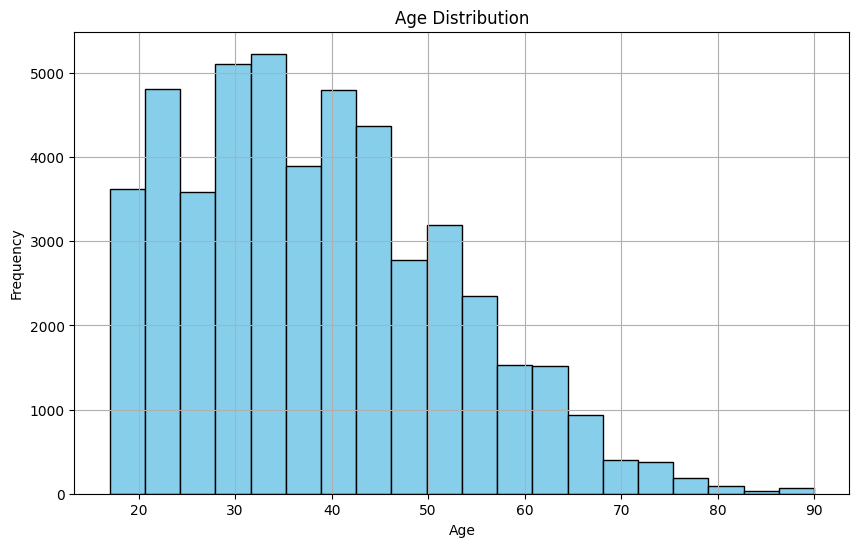

In [30]:
# Plot Age histogram
plt.figure(figsize=(10, 6))
plt.hist(X['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(True)
plt.show()

### age is skwed so get avg

In [31]:
X.loc[X['age'] >=80]['age'].value_counts()


age
90    55
80    38
81    37
82    15
84    13
83    11
88     6
85     5
87     3
89     2
86     1
Name: count, dtype: int64

### from 82 count lower so get avg from there

In [32]:
# Calculate the average age for the range 82-90
age_avg = X[(X['age'] >= 82) & (X['age'] < 90)]['age'].mean()

# Fill ages greater than 80 with the average age
X.loc[X['age'] > 80, 'age'] = age_avg


C:\Users\Acer\AppData\Local\Temp\ipykernel_12640\2692324793.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '84.16071428571429' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[X['age'] > 80, 'age'] = age_avg


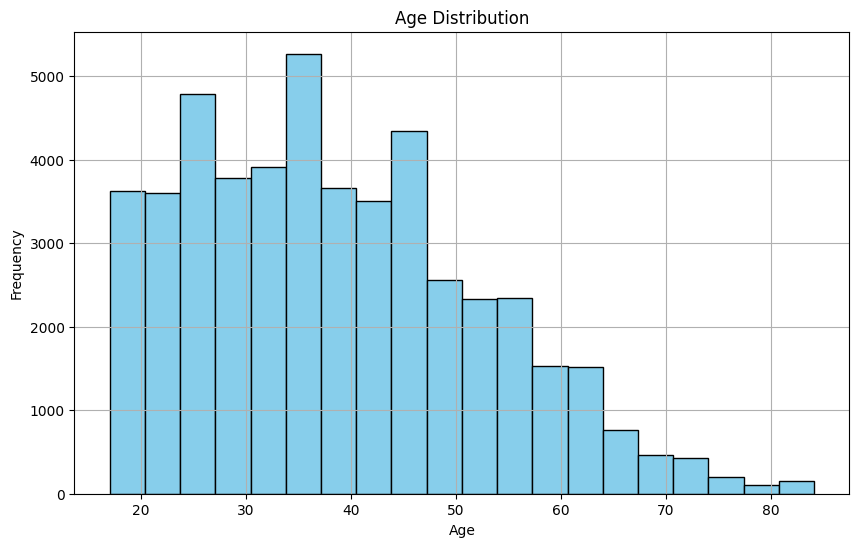

In [33]:
# Plot Age histogram
plt.figure(figsize=(10, 6))
plt.hist(X['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(True)
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_12640\1223259672.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")


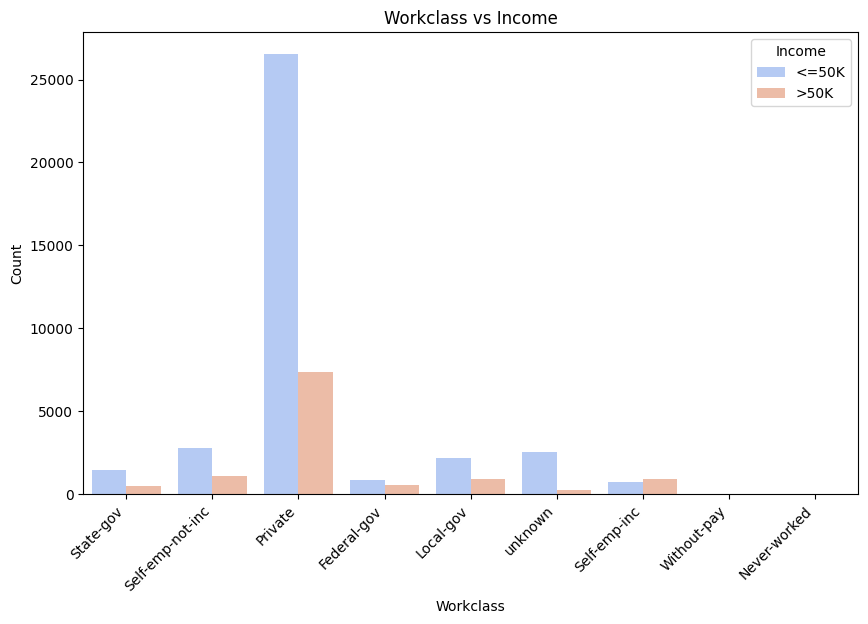

In [34]:
# Merge 'workclass' from X with 'income' from y
merged_data = pd.concat([X['workclass'], y], axis=1)

# Plot Workclass vs Income
plt.figure(figsize=(10, 6))
g = sns.countplot(x="workclass", hue="income", data=merged_data, palette="coolwarm")
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
g.set_xlabel("Workclass")
g.set_ylabel("Count")
plt.title("Workclass vs Income")
plt.legend(title="Income")
plt.show()


### ignore fnlwgt for now

C:\Users\Acer\AppData\Local\Temp\ipykernel_12640\1256549018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x="education", y="income", data=X, palette="muted")


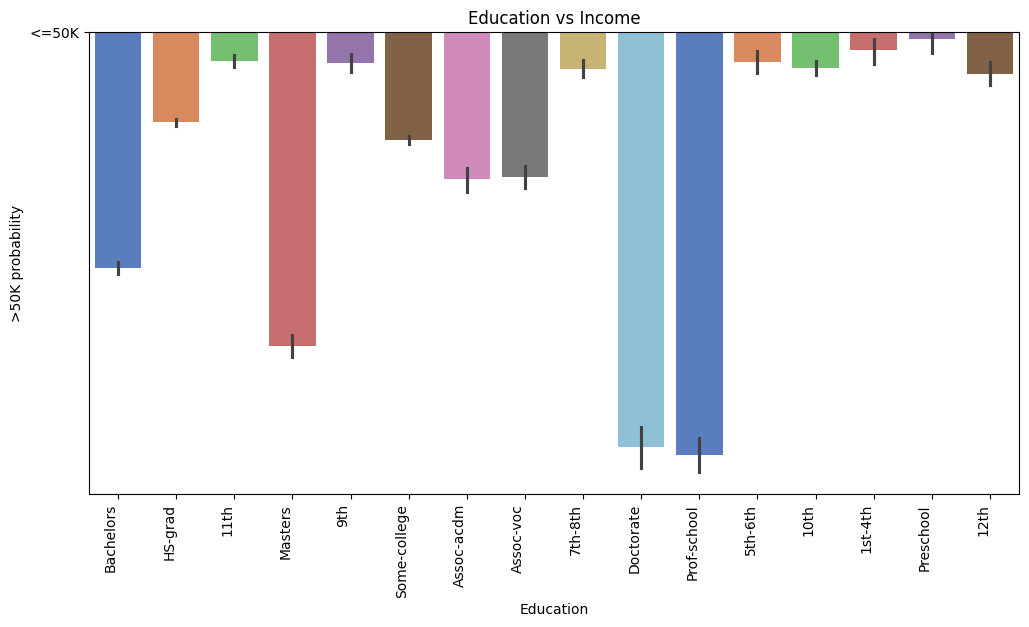

In [35]:
# Assuming 'income' is the target column in y DataFrame
X['income'] = y['income']

# Explore Education vs Income
plt.figure(figsize=(12, 6))
g = sns.barplot(x="education", y="income", data=X, palette="muted")
g.set_xlabel("Education")
g.set_ylabel(">50K probability")
plt.title("Education vs Income")
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_12640\3880158792.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")


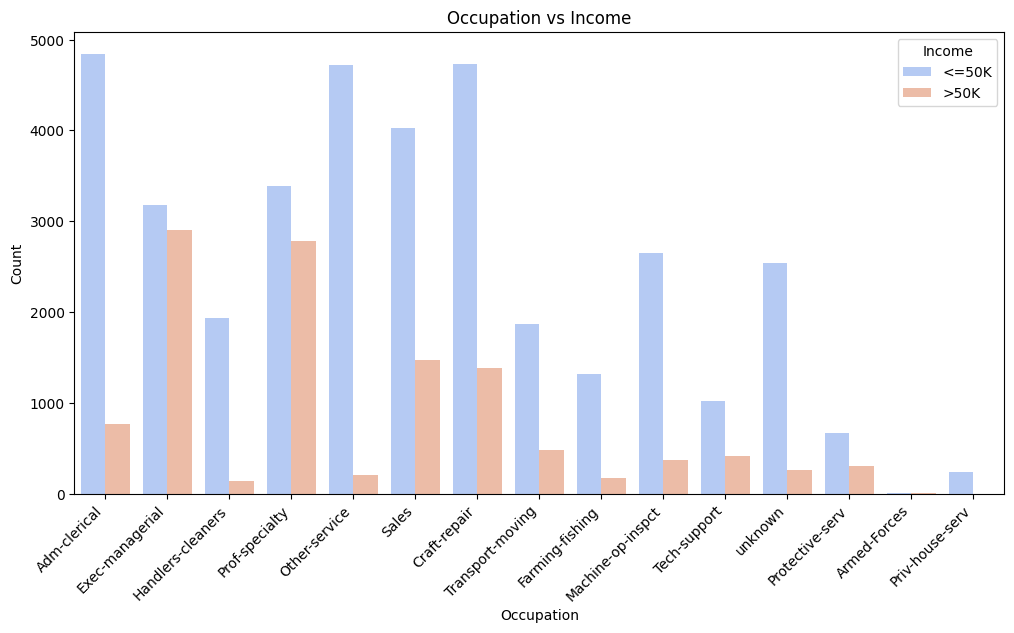

In [36]:
# Merge 'occupation' from X with 'income' from y
merged_data = pd.concat([X['occupation'], y], axis=1)

# Plot Occupation vs Income
plt.figure(figsize=(12, 6))
g = sns.countplot(x="occupation", hue="income", data=merged_data, palette="coolwarm")
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
g.set_xlabel("Occupation")
g.set_ylabel("Count")
plt.title("Occupation vs Income")
plt.legend(title="Income")
plt.show()
  

In [37]:
# Check for NaN values in the DataFrame
nan_count = X.isnull().sum()
print(nan_count)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


### Format income column

### Define the numerical and categorical features

In [38]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

# Identify Categorical features
categorical_features = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

### See how much of greater than and lower than incomes

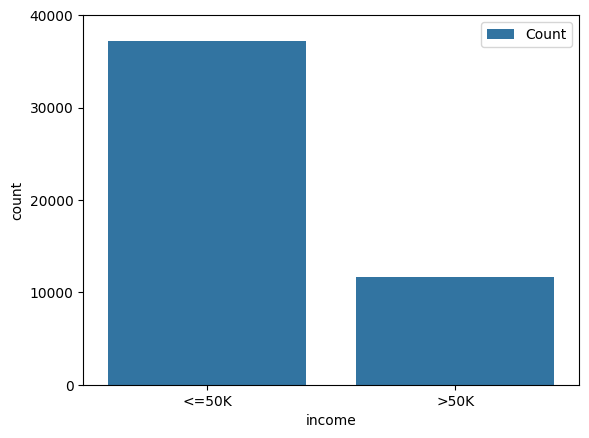

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of >50K & <=50K
sns.countplot(x='income',data=y, label="Count")
plt.yticks(range(0, 50000, 10000))
plt.show()


### Greater than 50k is lesser

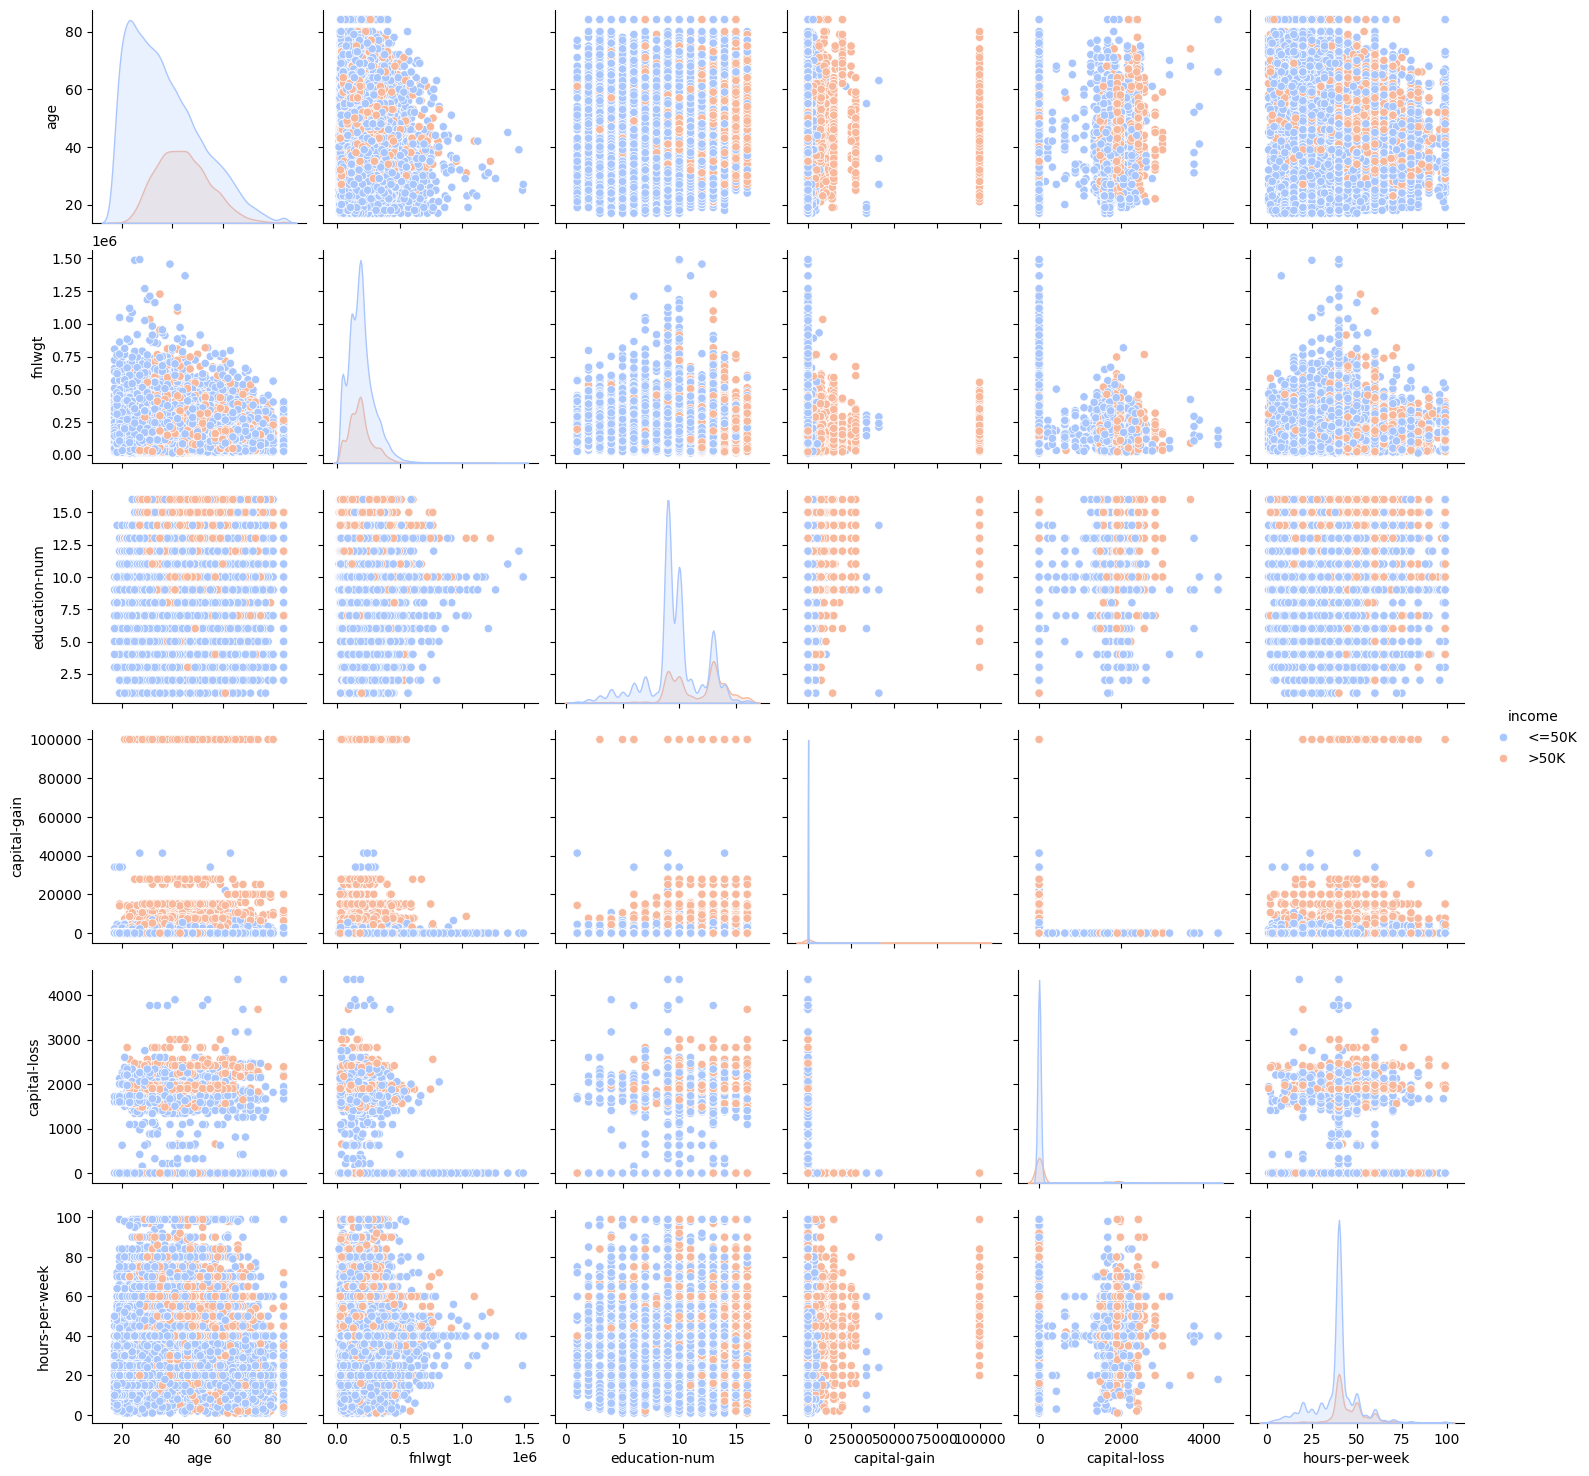

In [40]:
# Assuming 'income' is the target column in y DataFrame
numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Merge X and y on a common index or column
merged_data = pd.merge(X[numeric_features], y, left_index=True, right_index=True)

# Pairplot to visualize relationships between numerical features and income
sns.pairplot(merged_data, hue='income', palette='coolwarm')
plt.show()

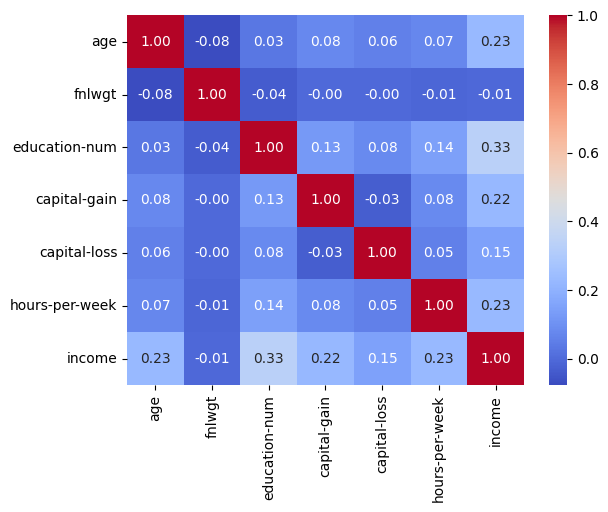

In [34]:
# Correlation matrix between numerical values and income
correlation_matrix = merged_data.corr()
g = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_2540\2714231276.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="education-num", y="income", data=X, kind="bar", height=6, palette="muted")


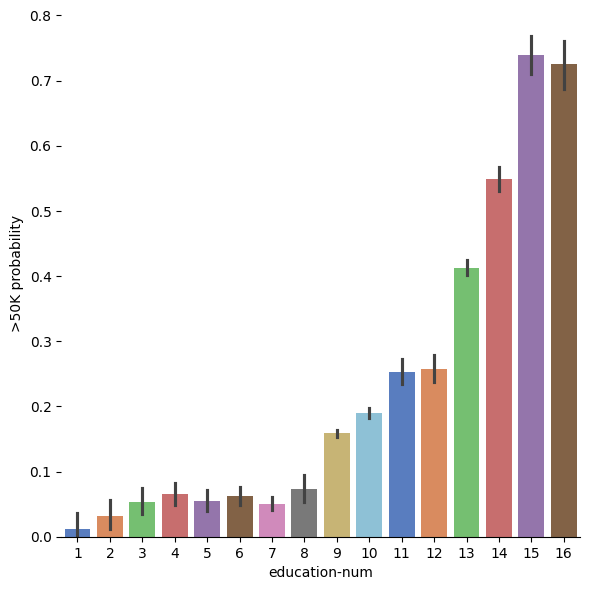

In [39]:

# Assuming 'income' is the target column in y DataFrame
X['income'] = y['income']

# Explore Education Num vs Income
g = sns.catplot(x="education-num", y="income", data=X, kind="bar", height=6, palette="muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

# Show the plot
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_2540\2177891896.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="hours-per-week", y="income", data=X, kind="bar", height=6, palette="muted")


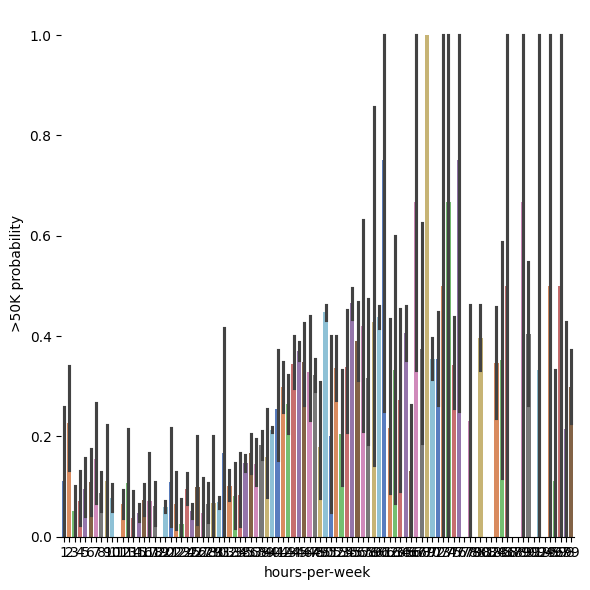

In [40]:

# Assuming 'income' is the target column in y DataFrame
X['income'] = y['income']

# Explore Education Num vs Income
g = sns.catplot(x="hours-per-week", y="income", data=X, kind="bar", height=6, palette="muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

# Show the plot
plt.show()


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*

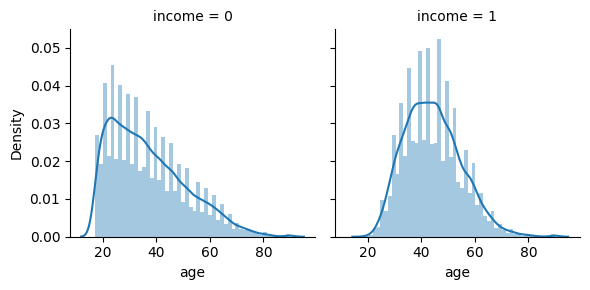

In [44]:
# Explore Age vs Income
g = sns.FacetGrid(X, col='income')
g = g.map(sns.distplot, "age")
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_2540\3425542185.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)  # Rotate x-axis labels for better visibility


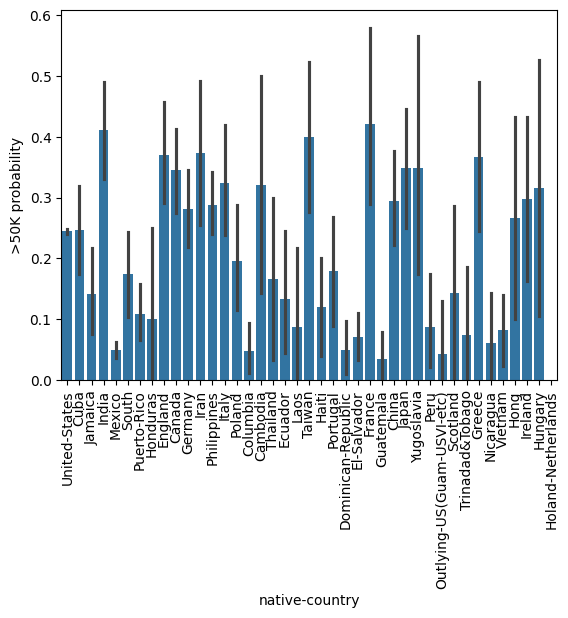

In [48]:
# Assuming 'income' is the target column in y DataFrame
X['income'] = y['income']

# Explore Native Country vs Income
g = sns.barplot(x="native-country", y="income", data=X)
g.set_ylabel(">50K probability")  # Corrected method name
g.set_xticklabels(g.get_xticklabels(), rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_2540\479173062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="sex", y="income", data=X, kind="bar", height=6, palette="muted")


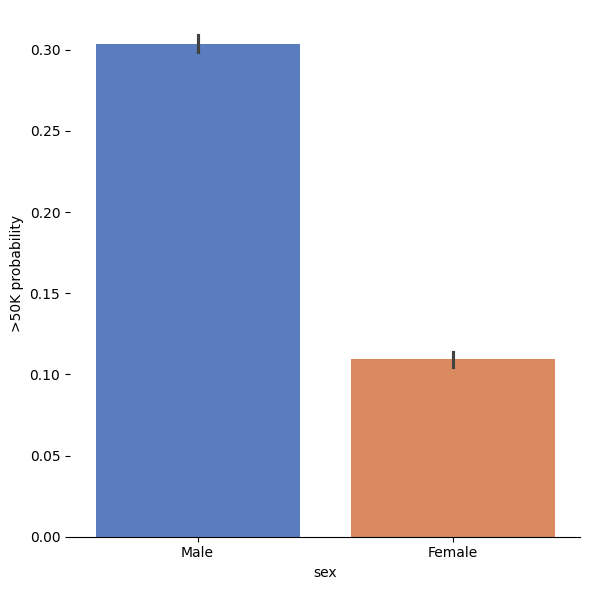

In [51]:

# Assuming 'income' is the target column in y DataFrame
X['income'] = y['income']

# Explore Education Num vs Income
g = sns.catplot(x="sex", y="income", data=X, kind="bar", height=6, palette="muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

# Show the plot
plt.show()


In [47]:
# from sklearn.preprocessing import OneHotEncoder

# categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# # Initialize the encoder
# encoder = OneHotEncoder(drop='first', sparse_output=False)

# # Fit and transform the categorical columns
# X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns))

# # Drop the original categorical columns from 'X'
# X = X.drop(categorical_columns, axis=1)

# # Concatenate the encoded features with the remaining numerical features
# X = pd.concat([X, X_encoded], axis=1)


In [43]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [45]:
# Initialize Naïve Bayes model
naive_bayes_model = GaussianNB()

# Train the model on the training set
naive_bayes_model.fit(X_train, y_train)

# Predictions on the test set
naive_bayes_predictions = naive_bayes_model.predict(X_test)

# Evaluate Naïve Bayes model
print("Naïve Bayes Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, naive_bayes_predictions))
print("Classification Report:\n", classification_report(y_test, naive_bayes_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, naive_bayes_predictions))


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Naïve Bayes Model Evaluation:
Accuracy: 0.5284061828232163


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.54      0.95      0.69      4936
      <=50K.       0.00      0.00      0.00      2478
        >50K       0.42      0.28      0.34      1562
       >50K.       0.35      0.02      0.04       793

    accuracy                           0.53      9769
   macro avg       0.33      0.31      0.27      9769
weighted avg       0.37      0.53      0.41      9769

Confusion Matrix:
 [[4707    0  229    0]
 [2344    0  134    0]
 [1093    0  439   30]
 [ 544    0  233   16]]


In [46]:
# Initialize Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
random_forest_model.fit(X_train, y_train)

# Predictions on the test set
random_forest_predictions = random_forest_model.predict(X_test)

# Evaluate Random Forest model
print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, random_forest_predictions))
print("Classification Report:\n", classification_report(y_test, random_forest_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, random_forest_predictions))


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest Model Evaluation:
Accuracy: 0.5276896304637118
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.59      0.80      0.68      4936
      <=50K.       0.30      0.14      0.19      2478
        >50K       0.48      0.51      0.50      1562
       >50K.       0.23      0.09      0.13       793

    accuracy                           0.53      9769
   macro avg       0.40      0.39      0.37      9769
weighted avg       0.47      0.53      0.48      9769

Confusion Matrix:
 [[3937  616  309   74]
 [1945  340  160   33]
 [ 505  107  804  146]
 [ 258   54  407   74]]
